# Setup Environment 

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

In [16]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.6 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 164.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 175.0 kB/s eta 0:00:01
     --------------------------------------- 60.6/60.6 kB 97.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 3.9 MB/s eta 0:00:03
    --------------------------------------- 0.3/10.6 MB 3.2 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.2 MB/s eta 0:00:05
   

# Import Library

In [18]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as plt_image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix, classification_report

# Data Preparation

### Augmented Data

In [19]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori dataset
dataset_dir = '../data/javaneseScript_byPhiard/train'
output_dir = '../data_pre/byPhiard_aug_v37'

datagen = ImageDataGenerator(
    rotation_range=19,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Membuat folder baru untuk menyimpan hasil augmentasi
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop melalui setiap kelas dalam dataset
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    # Membuat folder baru untuk setiap kelas di dalam folder output
    output_class_path = os.path.join(output_dir, class_name)
    if not os.path.exists(output_class_path):
        os.makedirs(output_class_path)

    # Mendapatkan list file gambar di setiap kelas
    image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))]

    # Loop melalui setiap file gambar dan augmentasi datanya
    for img_path in image_files:
        img = image.load_img(img_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Proses augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_path,
                                  save_prefix=os.path.splitext(os.path.basename(img_path))[0] + '_aug', save_format='png'):
            i += 1
            if i >= 500:  
                break
        break
            
print(f"\nAugmentasi Selesai!")


Augmentasi Selesai!


In [20]:
# Dictionary untuk menyimpan jumlah data di setiap kelas
kelas_data_count = {}

# Loop melalui setiap kelas di dalam folder output
for class_name in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_name)
    
    # Menghitung jumlah file gambar di setiap kelas
    num_images = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
    
    # Menyimpan jumlah data di setiap kelas ke dalam dictionary
    kelas_data_count[class_name] = num_images

# Menampilkan jumlah data di setiap kelas
for class_name, count in kelas_data_count.items():
    print(f"Kelas {class_name}: {count} gambar")

Kelas ba: 492 gambar
Kelas ca: 489 gambar
Kelas da: 491 gambar
Kelas dha: 491 gambar
Kelas ga: 489 gambar
Kelas ha: 484 gambar
Kelas ja: 492 gambar
Kelas ka: 490 gambar
Kelas la: 487 gambar
Kelas ma: 489 gambar
Kelas na: 487 gambar
Kelas nga: 484 gambar
Kelas nya: 492 gambar
Kelas pa: 491 gambar
Kelas ra: 488 gambar
Kelas sa: 487 gambar
Kelas ta: 489 gambar
Kelas tha: 481 gambar
Kelas wa: 488 gambar
Kelas ya: 485 gambar


### Imbalanced Dataset

In [ ]:
# import random
# import string

# # Path dataset
# data = output_dir

# # List kelas
# kelas_aksara = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# # Target jumlah gambar per kelas
# target_jumlah = 500

# # Loop untuk setiap kelas
# for kelas in kelas_aksara:
#     # Path kelas
#     kelas_path = os.path.join(data, kelas)
    
#     # Jumlah gambar saat ini
#     jumlah_gambar = len(os.listdir(kelas_path))
    
#     # Selisih gambar yang perlu ditambahkan
#     selisih = target_jumlah - jumlah_gambar
    
#     # Jika selisih positif, lakukan oversampling
#     if selisih > 0:
#         # Ambil sampel acak dari gambar yang sudah ada
#         gambar_oversampling = random.sample(os.listdir(kelas_path), selisih)
        
#         # Copy gambar oversampling ke dalam kelas
#         for gambar in gambar_oversampling:
#             source_path = os.path.join(kelas_path, gambar)
            
#             # Generate sufiks acak
#             sufiks_acak = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
            
#             # Tentukan path tujuan dengan menambahkan sufiks acak
#             target_path = os.path.join(kelas_path, f'{os.path.splitext(gambar)[0]}_{sufiks_acak}{os.path.splitext(gambar)[1]}')
            
#             # Salin gambar ke target path
#             shutil.copy(source_path, target_path)

# # Cetak ulang jumlah gambar per kelas setelah penyamaan
# for kelas in kelas_aksara:
#     kelas_path = os.path.join(data, kelas)
#     jumlah_gambar = len(os.listdir(kelas_path))
#     print(f'Aksara {kelas} jumlah: {jumlah_gambar}')

### Split Dataset

In [21]:
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
main_data_dir = output_dir

# Path ke direktori output untuk train dan test set
path_dir = '../data_split/javaneseScript_v7/'

# Membuat sub-direktori train dan test
train_dir = os.path.join(path_dir, 'train')
test_dir = os.path.join(path_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
for class_name in os.listdir(main_data_dir):
    class_path = os.path.join(main_data_dir, class_name)
    
    # Mendapatkan list file untuk kelas tertentu
    files = os.listdir(class_path)
    
    # Membagi data menjadi train dan test set
    train_files, test_files = train_test_split(files, test_size=0.3, random_state=42)
    
    # Membuat sub-direktori untuk masing-masing kelas di train dan test set
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Menyalin file ke dalam masing-masing sub-direktori
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
    
    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))

### Data Preparation

In [22]:
# Tentukan konstanta
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 64
NUM_CLASSES = 20
Class = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

train_dir = "../data_split/javaneseScript_v7/train" 
test_dir = "../data_split/javaneseScript_v7/test"

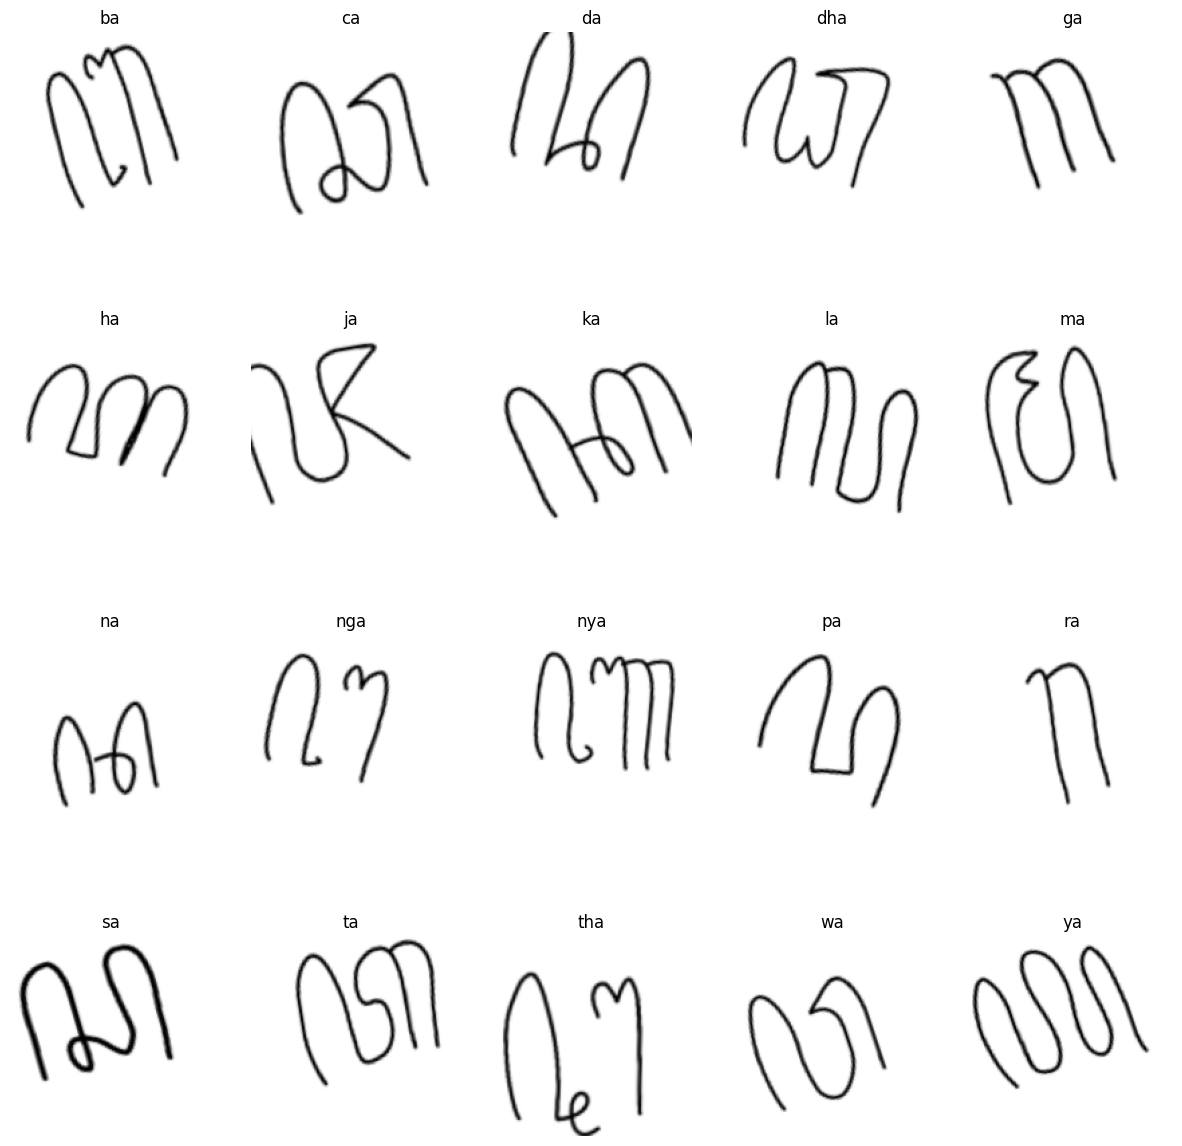

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

def show_random_images(directory, num_images_per_class=1):
    num_classes = len(os.listdir(directory))
    num_images = num_images_per_class * num_classes
    plt.figure(figsize=(15, 15))
    
    # Iterate over each class directory
    class_directories = os.listdir(directory)
    for i, class_dir in enumerate(class_directories):
        class_path = os.path.join(directory, class_dir)
        class_images = [os.path.join(class_path, name) for name in os.listdir(class_path)]
        
        # Randomly select num_images_per_class images from the current class
        selected_images = np.random.choice(class_images, num_images_per_class, replace=False)
        
        # Display the selected images
        for j, image_path in enumerate(selected_images):
            plt.subplot(4, 5, i*num_images_per_class + j + 1)
            plt.axis('off')
            plt.title(class_dir)
            img = plt_image.imread(image_path)
            plt.imshow(img)

# Panggil fungsi untuk menampilkan gambar
show_random_images(train_dir, num_images_per_class=1)
plt.show()

In [24]:
def count_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count = 0
        for name in files:
            if name.endswith(".png"):
              count = count + 1
        if count > 0:
          arr.append(count)
    return arr

def get_all_char_names(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        # print(dirs)
        arr.append(dirs)
        break
    return arr

20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


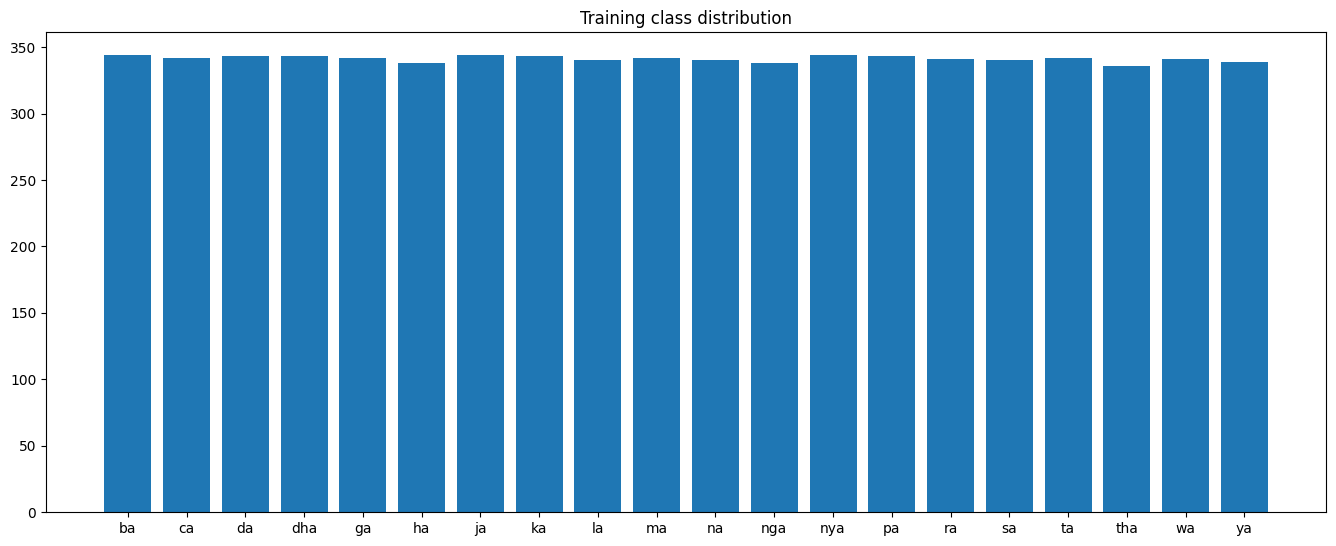

In [25]:
image_count = count_files(train_dir)
print(len(image_count))
chars = get_all_char_names(train_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Training class distribution")
plt.show()

In [26]:
# Menghitung jumlah gambar per kelas
file_list = os.listdir(train_dir)

jumlah_gambar_per_kelas = []

for kelas in file_list:
    kelas_path = os.path.join(train_dir, kelas)
    jumlah_gambar = len(os.listdir(kelas_path))
    jumlah_gambar_per_kelas.append(jumlah_gambar)

# Mengecek apakah jumlah data per kelas sudah seimbang
balanced = all(jumlah == jumlah_gambar_per_kelas[0] for jumlah in jumlah_gambar_per_kelas)

# Menampilkan pesan sesuai dengan hasil pemeriksaan
if balanced:
    print("Balanced Data !")
else:
    print("Imbalanced Data !!!\n")
    # Jika imbalanced, tampilkan jumlah data per kelas
    for kelas, jumlah in zip(file_list, jumlah_gambar_per_kelas):
        print(f'Aksara {kelas} jumlah: {jumlah}')

Imbalanced Data !!!

Aksara ba jumlah: 344
Aksara ca jumlah: 342
Aksara da jumlah: 343
Aksara dha jumlah: 343
Aksara ga jumlah: 342
Aksara ha jumlah: 338
Aksara ja jumlah: 344
Aksara ka jumlah: 343
Aksara la jumlah: 340
Aksara ma jumlah: 342
Aksara na jumlah: 340
Aksara nga jumlah: 338
Aksara nya jumlah: 344
Aksara pa jumlah: 343
Aksara ra jumlah: 341
Aksara sa jumlah: 340
Aksara ta jumlah: 342
Aksara tha jumlah: 336
Aksara wa jumlah: 341
Aksara ya jumlah: 339


20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


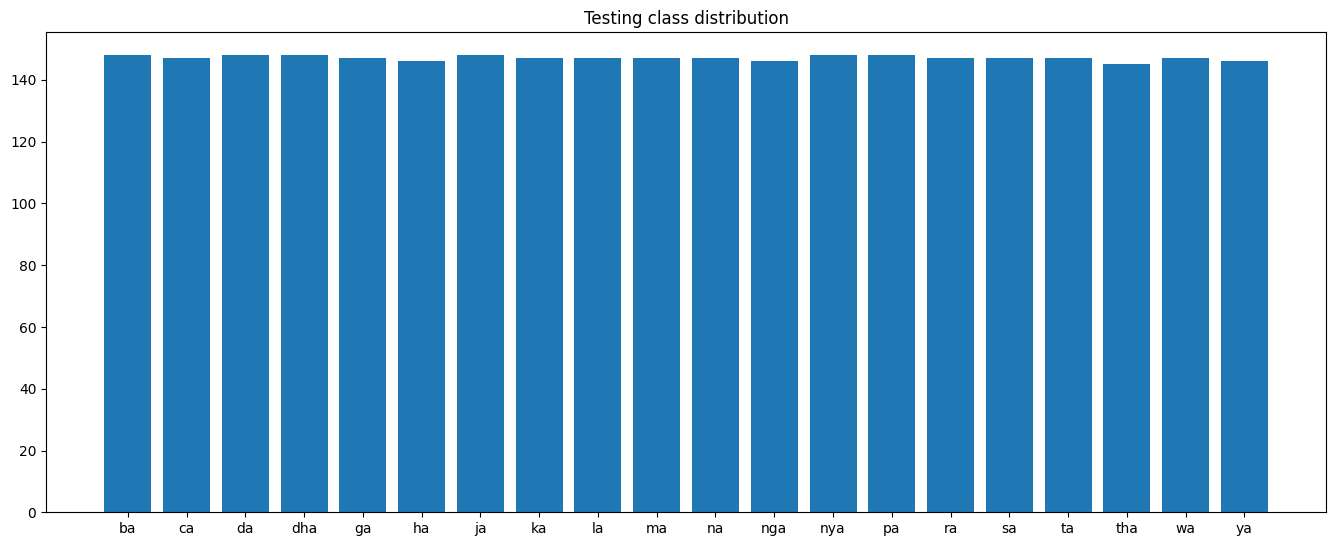

In [27]:
image_count = count_files(test_dir)
print(len(image_count))
chars = get_all_char_names(test_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Testing class distribution")
plt.show()

In [28]:
# Buat generator data dengan augmentasi data untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

Found 6825 images belonging to 20 classes.
Found 2941 images belonging to 20 classes.


In [29]:
# # Mencari class weights untuk mengatasi ketidakseimbangan kelas
# class_weights = compute_sample_weight('balanced', train_generator.classes)
# class_weight = dict(enumerate(class_weights))

# Build the Model

### Model - CNN + VGG

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_vgg16(INPUT_SHAPE=(64, 64, 3), num_classes=NUM_CLASSES):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=INPUT_SHAPE))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Classification block
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.75))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.75))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the VGG16 model
model = build_vgg16()
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,856,724 (56.67 MB)

 Trainable params: 14,856,724 (56.67 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Fungsi untuk menetapkan learning rate secara dinamis
def lr_scheduler(epoch, lr):
    if epoch % 50 == 0 and epoch > 0:
        lr = lr * 0.9  # Mengurangi learning rate setiap 50 epoch
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

callbacks_list = [lr_schedule]

In [34]:
# Melatih Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    # class_weight=class_weight, 
    callbacks=callbacks_list
)

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1082s 10s/step - accuracy: 0.0579 - loss: 2.9954 - learning_rate: 1.0000e-04
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 641us/step - accuracy: 0.0312 - loss: 2.9955 - learning_rate: 1.0000e-04
Epoch 3/50


c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


106/106 ━━━━━━━━━━━━━━━━━━━━ 968s 9s/step - accuracy: 0.0529 - loss: 2.9956 - learning_rate: 1.0000e-04
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 96us/step - accuracy: 0.0156 - loss: 2.9976 - learning_rate: 1.0000e-04
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 987s 9s/step - accuracy: 0.0456 - loss: 2.9964 - learning_rate: 1.0000e-04
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 92us/step - accuracy: 0.0312 - loss: 2.9959 - learning_rate: 1.0000e-04
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1038s 10s/step - accuracy: 0.0470 - loss: 2.9958 - learning_rate: 1.0000e-04
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 163us/step - accuracy: 0.0156 - loss: 2.9972 - learning_rate: 1.0000e-04
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 954s 9s/step - accuracy: 0.0456 - loss: 2.9958 - learning_rate: 1.0000e-04
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 192us/step - accuracy: 0.0312 - loss: 2.9945 - learning_rate: 1.0000e-04
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 943s 9s/step - accuracy: 0.0487 - loss: 2.99

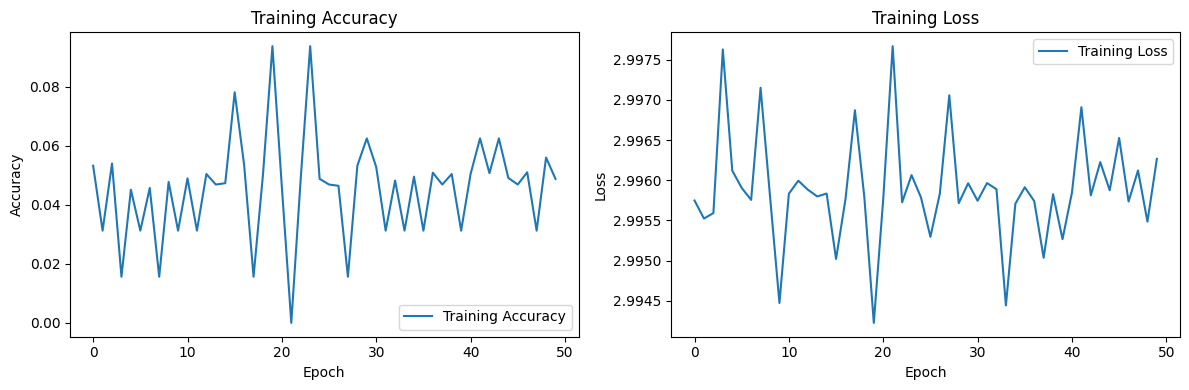

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [36]:
# # Menampilkan grafik training dan validation accuracy
# import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']

# val_loss = history.history['val_loss']

# epochs_range = range(len(acc))

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

In [37]:
# Evaluasi model pada data uji
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.0603 - loss: 2.9956
Test Accuracy: 5.03%


In [39]:
# Menyimpan Model
model.save('../models/aksarajawa_v1.h5')

# Try Predict

In [42]:
# Import the necessary modules
from sklearn import metrics
import math

# Buat generator data untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    batch_size=32,
    color_mode="rgb",
    target_size=(64, 64),
    class_mode='categorical'
)

# Ganti np.math dengan math
test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)

# Gunakan Model.predict alih-alih Model.predict_generator
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Dapatkan kelas yang paling mungkin
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

Found 2941 images belonging to 20 classes.
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step


In [44]:
# Lakukan import untuk metrics
from sklearn import metrics

# Hitung dan tampilkan classification report
report = metrics.classification_report(true_classes,
                                       predicted_classes,
                                       target_names = class_labels)
print(report)

# Hitung dan tampilkan confusion matrix
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

              precision    recall  f1-score   support

          ba       0.00      0.00      0.00       148
          ca       0.00      0.00      0.00       147
          da       0.00      0.00      0.00       148
         dha       0.05      1.00      0.10       148
          ga       0.00      0.00      0.00       147
          ha       0.00      0.00      0.00       146
          ja       0.00      0.00      0.00       148
          ka       0.00      0.00      0.00       147
          la       0.00      0.00      0.00       147
          ma       0.00      0.00      0.00       147
          na       0.00      0.00      0.00       147
         nga       0.00      0.00      0.00       146
         nya       0.00      0.00      0.00       148
          pa       0.00      0.00      0.00       148
          ra       0.00      0.00      0.00       147
          sa       0.00      0.00      0.00       147
          ta       0.00      0.00      0.00       147
         tha       0.00    

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

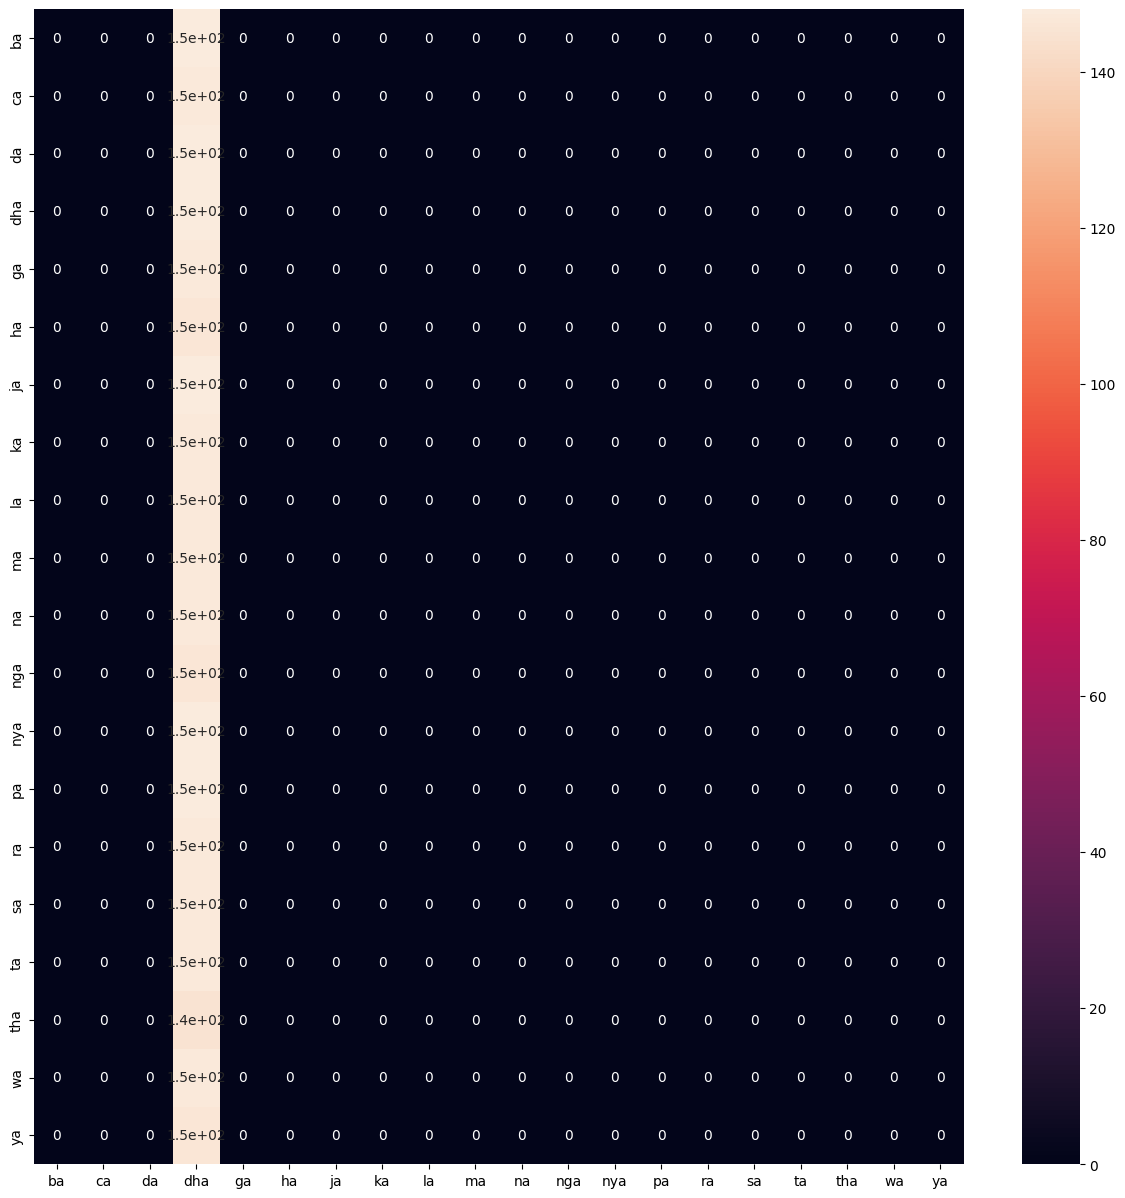

In [45]:
import pandas as pd
import seaborn as sn

# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(confusion_matrix,
                     index=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                        "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")],

                     columns=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                          "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")])
# Tampilkan heatmap
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True)

In [ ]:
# Menguji Model
model = load_model('../models/aksarajawa_cnn_model.h5')
test_image_path = '../data/databyPhiard_original/prediction/ba17.png'
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path2 = '../data/databyPhiard_original/prediction/ba49.mine2.png'
img = image.load_img(test_image_path2, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path2)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path3 = '../data/databyPhiard_original/prediction/ca2.png'
img = image.load_img(test_image_path3, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path3)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path4 = '../data/databyPhiard_original/prediction/da5.png'
img = image.load_img(test_image_path4, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path4)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path5 = '../data/databyPhiard_original/prediction/dha11.png'
img = image.load_img(test_image_path5, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path5)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path6 = '../data/databyPhiard_original/prediction/ga16.png'
img = image.load_img(test_image_path6, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path6)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path7 = '../data/databyPhiard_original/prediction/ha0.png'
img = image.load_img(test_image_path7, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path7)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path8 = '../data/databyPhiard_original/prediction/ja12.png'
img = image.load_img(test_image_path8, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path8)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path9 = '../data/databyPhiard_original/prediction/ka4.png'
img = image.load_img(test_image_path9, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path9)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path10 = '../data/databyPhiard_original/prediction/la9.png'
img = image.load_img(test_image_path10, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path10)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path11 = '../data/databyPhiard_original/prediction/ma.0.jpg'
img = image.load_img(test_image_path11, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path11)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path12 = '../data/databyPhiard_original/prediction/ma.1.jpg'
img = image.load_img(test_image_path12, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path12)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path13 = '../data/databyPhiard_original/prediction/ma15.png'
img = image.load_img(test_image_path13, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path13)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path14 = '../data/databyPhiard_original/prediction/na1.png'
img = image.load_img(test_image_path14, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path14)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path15 = '../data/databyPhiard_original/prediction/nga19.png'
img = image.load_img(test_image_path15, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path15)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path16 = '../data/databyPhiard_original/prediction/nga220.pred.png'
img = image.load_img(test_image_path16, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path16)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path17 = '../data/databyPhiard_original/prediction/nya14.png'
img = image.load_img(test_image_path17, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path17)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path18 = '../data/databyPhiard_original/prediction/pa10.png'
img = image.load_img(test_image_path18, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path18)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path19 = '../data/databyPhiard_original/prediction/ra164.pred.png'
img = image.load_img(test_image_path19, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path19)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path20 = '../data/databyPhiard_original/prediction/ra3.png'
img = image.load_img(test_image_path20, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path20)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path21 = '../data/databyPhiard_original/prediction/sa7.png'
img = image.load_img(test_image_path21, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path21)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path22 = '../data/databyPhiard_original/prediction/ta6.png'
img = image.load_img(test_image_path22, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path22)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path23 = '../data/databyPhiard_original/prediction/tha18.png'
img = image.load_img(test_image_path23, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path23)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path24 = '../data/databyPhiard_original/prediction/wa8.png'
img = image.load_img(test_image_path24, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path24)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path25 = '../data/databyPhiard_original/prediction/ya13.png'
img = image.load_img(test_image_path25, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path25)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/nya_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/sa_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/ha201.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)